In [30]:
# Apis for our Data
import pandas_datareader as pdr
from pandas_datareader import data as wb

# Date time format
import datetime as dt
from pandas.tseries.offsets import DateOffset

# Prophet
from prophet import Prophet

In [31]:
# Dictionary of States to be used for home prices 

# Dictionary of States to be used for home prices 

# User Inputs State
# Dictionary for home prices
# CA= LA, FL= Tampa, WA= washington, DC = washington DC
# Creating a Dictionary
Dict = {'CA': 'LXXRSA',
        'WA': 'SEXRNSA',
        'NY': 'NYXRSA',
        'IL': 'CHXRSA',
        'AZ': 'PHXRNSA',
        'FL': 'TPXRSA',
        'TX': 'DAXRNSA',
        'CO': 'DNXRSA',
        'MA': 'BOXRSA',
        'GA': 'ATXRNSA',
        'OR': 'POXRSA',
        'NV': 'LVXRNSA',
        'DC': 'WDXRSA',
        'USA': 'CSUSHPINSA'}

# States Housing Prices

# Initiate the desired State

name=str(input('Enter State abbreviation ')).upper()
ticker=(Dict.get(name))
start = dt.datetime(1987, 1, 1)
end = dt.datetime(2023, 1, 27)
states_housing_prices = wb.DataReader(f'{ticker}', 'fred', start, end)


name_2=(Dict.get(f'{name}'))
name_2

# resample data - convert monthly data to daily data by forward filling the missing data
# states_housing_prices = states_housing_prices[[f'{name_2}']].resample("D").ffill()
states_housing_prices


Enter State abbreviation  ny


,NYXRSA
DATE,
1987-01-01,74.678440
1987-02-01,76.043687
1987-03-01,77.237075
1987-04-01,78.281527
1987-05-01,79.675331
...,...
2021-12-01,253.070411
2022-01-01,255.902870
2022-02-01,259.249508


In [32]:
# United States National Housing Prices Dataframe
USA = wb.DataReader('CSUSHPINSA', 'fred', start, end)

USA

,CSUSHPINSA
DATE,
1987-01-01,63.735
1987-02-01,64.134
1987-03-01,64.470
1987-04-01,64.974
1987-05-01,65.549
...,...
2021-12-01,278.694
2022-01-01,282.069
2022-02-01,287.304


In [33]:
# 15 year Mortgage Rate
mortgage15_year = wb.DataReader('MORTGAGE15US', 'fred', start, end)
mortgage15_year

,MORTGAGE15US
DATE,
1991-08-30,8.77
1991-09-06,8.79
1991-09-13,8.68
1991-09-20,8.62
1991-09-27,8.59
...,...
2022-06-16,4.81
2022-06-23,4.92
2022-06-30,4.83


In [34]:
# 30 year Mortgage Rate
mortgage30_year = wb.DataReader('MORTGAGE30US', 'fred',  start, end )
mortgage30_year

,MORTGAGE30US
DATE,
1987-01-02,9.37
1987-01-09,9.32
1987-01-16,9.21
1987-01-23,9.04
1987-01-30,9.08
...,...
2022-06-16,5.78
2022-06-23,5.81
2022-06-30,5.70


In [35]:
# Create a Prophet model for 15 Year
model_mortgage15 = Prophet()

# Create a Prophet model for 30 Year
model_mortgage30 = Prophet()

# Create a Prophet model for U.S. National Home Price Index
model_USA = Prophet()

# Create a Prophet model for Desired States index.
model_states_housing_prices = Prophet()

In [36]:
# Rename the columns to match the Prophet model syntax ["ds", "y"]

# 15 year Mortgage
mortgage15_year_prophet_model = mortgage15_year.reset_index()
mortgage15_year_prophet_model.columns = ['ds', 'y']

# 30 year Mortgage
mortgage30_year_prophet_model = mortgage15_year.reset_index()
mortgage30_year_prophet_model.columns = ['ds', 'y']

# State Housing Prices
states_housing_prices_prophet_model = states_housing_prices.reset_index()
states_housing_prices_prophet_model.columns = ['ds', 'y']

# United States National Home Price Index
USA_prophet_model = USA.reset_index()
USA_prophet_model.columns = ['ds', 'y']


display(mortgage15_year_prophet_model.head())
display(mortgage30_year_prophet_model.head())
display(states_housing_prices_prophet_model.head())
display(USA_prophet_model.head())

,ds,y
0,1991-08-30,8.77
1,1991-09-06,8.79
2,1991-09-13,8.68
3,1991-09-20,8.62
4,1991-09-27,8.59


,ds,y
0,1991-08-30,8.77
1,1991-09-06,8.79
2,1991-09-13,8.68
3,1991-09-20,8.62
4,1991-09-27,8.59


,ds,y
0,1987-01-01,74.678440
1,1987-02-01,76.043687
2,1987-03-01,77.237075
3,1987-04-01,78.281527
4,1987-05-01,79.675331


,ds,y
0,1987-01-01,63.735
1,1987-02-01,64.134
2,1987-03-01,64.470
3,1987-04-01,64.974
4,1987-05-01,65.549


In [37]:
# Fit the Prophet model for 15 Year
model_mortgage15.fit(mortgage15_year_prophet_model)

# Fit the Prophet model for 30 Year
model_mortgage30.fit(mortgage30_year_prophet_model)

# Fit the Prophet model for State Housing Prices
model_states_housing_prices.fit(states_housing_prices_prophet_model)


# Fit the Prophet model for United States National Home Price Index
model_USA.fit(USA_prophet_model)

# Google Trends data is collected weekly. So, set the freq parameter to W, and set periods=52 (because one year has 52 weeks).

# Forecast one year of weekly future trends data for the 15 year mortgage 
future_mortgage15 = model_mortgage15.make_future_dataframe(periods=52, freq="W")

# Forecast one year of weekly future trends data for the 30 year mortgage 
future_mortgage30 = model_mortgage30.make_future_dataframe(periods=52, freq="W")

# Forecast one year of weekly future trends data for the Future State Housing Prices 
future_states_housing_prices = model_states_housing_prices.make_future_dataframe(periods=52, freq="W")

# Forecast one year of weekly future trends data for the Future United States National Home Price Index
future_USA = model_USA.make_future_dataframe(periods=52, freq="W")


# Display the last five rows of the future DataFrame
display(future_mortgage15.tail())
display(future_mortgage30.tail())
display(future_states_housing_prices.tail())
display(future_USA.tail())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1659,2023-06-11
1660,2023-06-18
1661,2023-06-25
1662,2023-07-02
1663,2023-07-09


,ds
1659,2023-06-11
1660,2023-06-18
1661,2023-06-25
1662,2023-07-02
1663,2023-07-09


,ds
471,2023-02-26
472,2023-03-05
473,2023-03-12
474,2023-03-19
475,2023-03-26


,ds
471,2023-02-26
472,2023-03-05
473,2023-03-12
474,2023-03-19
475,2023-03-26


In [38]:
# Make predictions for mortgage15 using the future_mortgage15 DataFrame
forecast_mortgage15 = model_mortgage15.predict(future_mortgage15)

# Display the first five rows of the forecast_mortgage15 DataFrame
forecast_mortgage15.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1991-08-30,8.242186,7.555732,8.708873,8.242186,8.242186,-0.075514,-0.075514,-0.075514,-0.066628,-0.066628,-0.066628,-0.008886,-0.008886,-0.008886,0.0,0.0,0.0,8.166672
1,1991-09-06,8.235428,7.574118,8.756814,8.235428,8.235428,-0.082911,-0.082911,-0.082911,-0.066628,-0.066628,-0.066628,-0.016283,-0.016283,-0.016283,0.0,0.0,0.0,8.152517
2,1991-09-13,8.228669,7.510775,8.743250,8.228669,8.228669,-0.101414,-0.101414,-0.101414,-0.066628,-0.066628,-0.066628,-0.034786,-0.034786,-0.034786,0.0,0.0,0.0,8.127255
3,1991-09-20,8.221911,7.524677,8.654263,8.221911,8.221911,-0.127630,-0.127630,-0.127630,-0.066628,-0.066628,-0.066628,-0.061002,-0.061002,-0.061002,0.0,0.0,0.0,8.094281
4,1991-09-27,8.215152,7.488259,8.640669,8.215152,8.215152,-0.147163,-0.147163,-0.147163,-0.066628,-0.066628,-0.066628,-0.080535,-0.080535,-0.080535,0.0,0.0,0.0,8.067990


In [39]:
# Make predictions for mortgage30 using the future_mortgage30 DataFrame
forecast_mortgage30 = model_mortgage30.predict(future_mortgage30)

# Display the first five rows of the forecast_mortgage30 DataFrame
forecast_mortgage30.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1991-08-30,8.242186,7.616681,8.765697,8.242186,8.242186,-0.075514,-0.075514,-0.075514,-0.066628,-0.066628,-0.066628,-0.008886,-0.008886,-0.008886,0.0,0.0,0.0,8.166672
1,1991-09-06,8.235428,7.554923,8.742569,8.235428,8.235428,-0.082911,-0.082911,-0.082911,-0.066628,-0.066628,-0.066628,-0.016283,-0.016283,-0.016283,0.0,0.0,0.0,8.152517
2,1991-09-13,8.228669,7.526665,8.716212,8.228669,8.228669,-0.101414,-0.101414,-0.101414,-0.066628,-0.066628,-0.066628,-0.034786,-0.034786,-0.034786,0.0,0.0,0.0,8.127255
3,1991-09-20,8.221911,7.531476,8.719974,8.221911,8.221911,-0.127630,-0.127630,-0.127630,-0.066628,-0.066628,-0.066628,-0.061002,-0.061002,-0.061002,0.0,0.0,0.0,8.094281
4,1991-09-27,8.215152,7.462046,8.713546,8.215152,8.215152,-0.147163,-0.147163,-0.147163,-0.066628,-0.066628,-0.066628,-0.080535,-0.080535,-0.080535,0.0,0.0,0.0,8.067990


In [40]:
# Make predictions for forecast_states_housing_prices using the future_State Housing Prices DataFrame
forecast_states_housing_prices = model_states_housing_prices.predict(future_states_housing_prices)

# Display the first five rows of the forecast_states_housing_prices DataFrame
forecast_states_housing_prices.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-01-01,82.860821,77.330567,89.235739,82.860821,82.860821,0.264556,0.264556,0.264556,0.264556,0.264556,0.264556,0.0,0.0,0.0,83.125376
1,1987-02-01,82.745207,76.612555,89.763692,82.745207,82.745207,0.230008,0.230008,0.230008,0.230008,0.230008,0.230008,0.0,0.0,0.0,82.975215
2,1987-03-01,82.640782,77.725404,90.518220,82.640782,82.640782,1.571531,1.571531,1.571531,1.571531,1.571531,1.571531,0.0,0.0,0.0,84.212312
3,1987-04-01,82.525168,77.563106,89.788393,82.525168,82.525168,1.429384,1.429384,1.429384,1.429384,1.429384,1.429384,0.0,0.0,0.0,83.954552
4,1987-05-01,82.413284,76.050303,88.962660,82.413284,82.413284,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,0.0,0.0,0.0,82.280076


In [41]:
# Make predictions for United States National Home Price Index using the future_United States National Home Price Index DataFrame
forecast_USA = model_USA.predict(future_USA)

# Display the first five rows of the forecast_USA DataFrame
forecast_USA.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-01-01,67.076515,58.450895,73.629383,67.076515,67.076515,-0.830069,-0.830069,-0.830069,-0.830069,-0.830069,-0.830069,0.0,0.0,0.0,66.246446
1,1987-02-01,67.261793,58.572520,73.950579,67.261793,67.261793,-1.216524,-1.216524,-1.216524,-1.216524,-1.216524,-1.216524,0.0,0.0,0.0,66.045270
2,1987-03-01,67.429142,60.596315,75.886418,67.429142,67.429142,0.975314,0.975314,0.975314,0.975314,0.975314,0.975314,0.0,0.0,0.0,68.404456
3,1987-04-01,67.614420,61.145354,76.142517,67.614420,67.614420,1.362764,1.362764,1.362764,1.362764,1.362764,1.362764,0.0,0.0,0.0,68.977184
4,1987-05-01,67.793722,59.539547,75.072262,67.793722,67.793722,0.029710,0.029710,0.029710,0.029710,0.029710,0.029710,0.0,0.0,0.0,67.823431


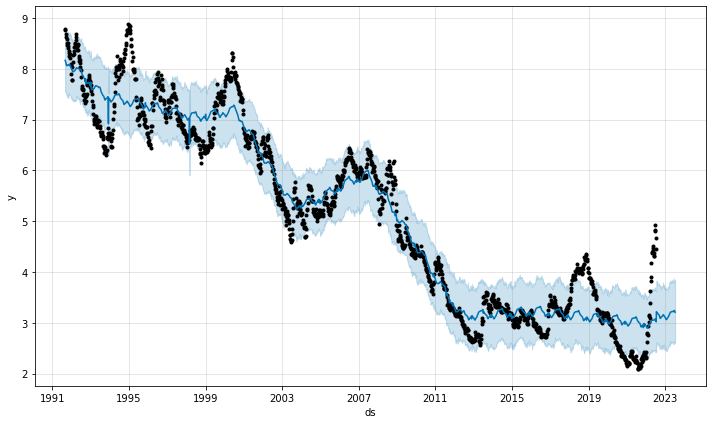

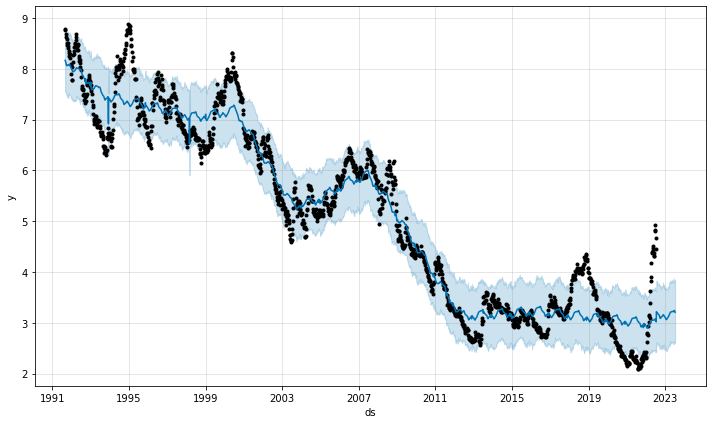

In [42]:
# Plot the Prophet predictions for mortgage15
model_mortgage15.plot(forecast_mortgage15)

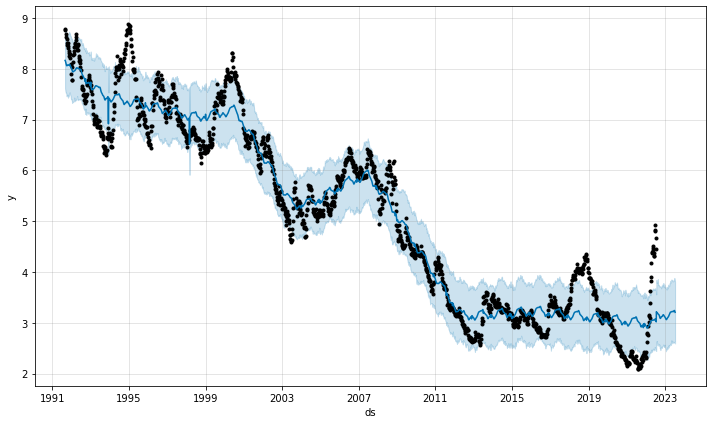

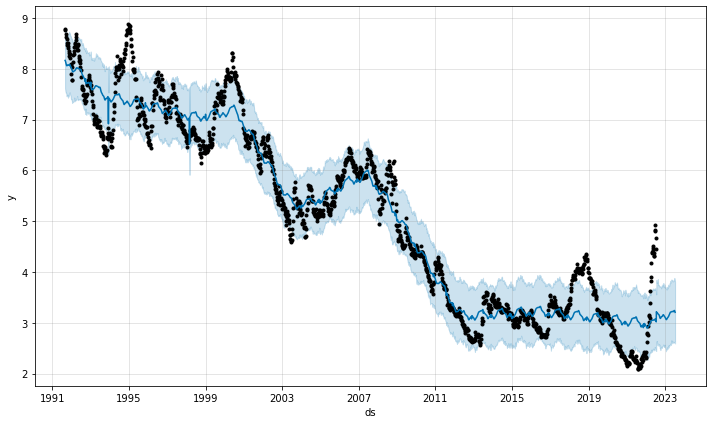

In [43]:
# Plot the Prophet predictions for mortgage30
model_mortgage30.plot(forecast_mortgage30)

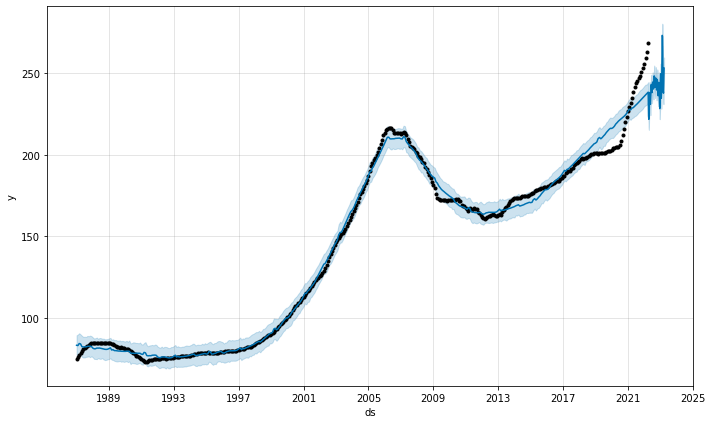

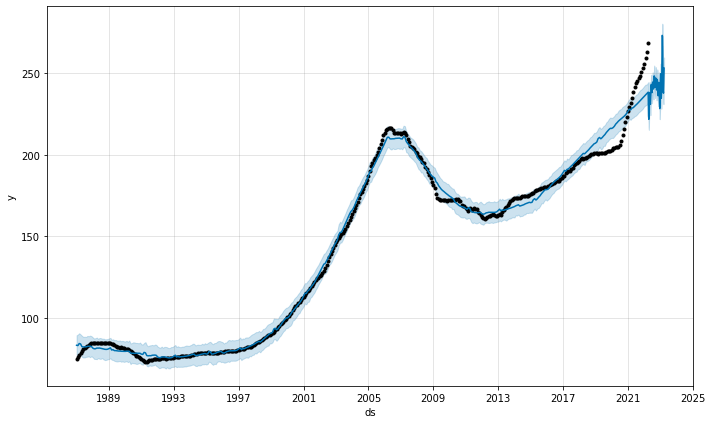

In [44]:
# Plot the Prophet predictions for states_housing_prices
model_states_housing_prices.plot(forecast_states_housing_prices)

In [54]:
forecast_states_housing_prices

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1987-01-01,82.860821,77.330567,89.235739,82.860821,82.860821,0.264556,0.264556,0.264556,0.264556,0.264556,0.264556,0.0,0.0,0.0,83.125376
1987-02-01,82.745207,76.612555,89.763692,82.745207,82.745207,0.230008,0.230008,0.230008,0.230008,0.230008,0.230008,0.0,0.0,0.0,82.975215
1987-03-01,82.640782,77.725404,90.518220,82.640782,82.640782,1.571531,1.571531,1.571531,1.571531,1.571531,1.571531,0.0,0.0,0.0,84.212312
1987-04-01,82.525168,77.563106,89.788393,82.525168,82.525168,1.429384,1.429384,1.429384,1.429384,1.429384,1.429384,0.0,0.0,0.0,83.954552
1987-05-01,82.413284,76.050303,88.962660,82.413284,82.413284,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,0.0,0.0,0.0,82.280076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-26,245.833282,248.992774,262.389214,244.337551,246.957242,9.797197,9.797197,9.797197,9.797197,9.797197,9.797197,0.0,0.0,0.0,255.630479
2023-03-05,246.013216,232.602299,245.639395,244.443919,247.190224,-6.606068,-6.606068,-6.606068,-6.606068,-6.606068,-6.606068,0.0,0.0,0.0,239.407148
2023-03-12,246.193149,231.033204,243.999140,244.543366,247.446950,-8.418322,-8.418322,-8.418322,-8.418322,-8.418322,-8.418322,0.0,0.0,0.0,237.774828


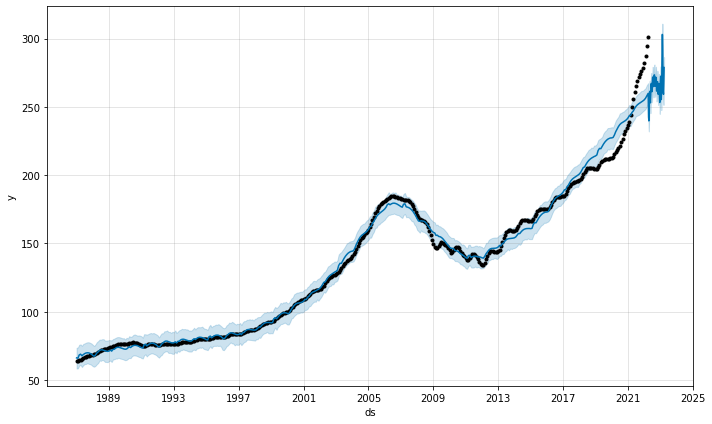

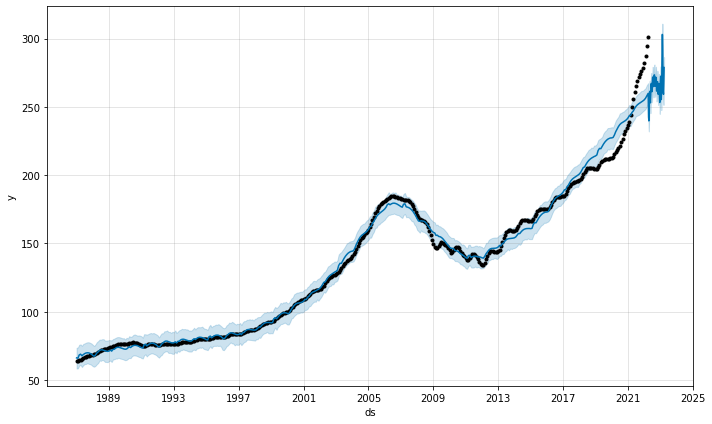

In [45]:
# Plot the Prophet predictions for United States National Home Price Index
model_USA.plot(forecast_USA)

In [46]:
# Set the index in the forecast_mortgage15 DataFrame to the ds datetime column 
forecast_mortgage15 = forecast_mortgage15.set_index('ds')

# Display the forecast_mortgage15 DataFrame
forecast_mortgage15.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
1991-08-30,8.242186,7.555732,8.708873,8.242186,8.242186,-0.075514,-0.075514,-0.075514,-0.066628,-0.066628,-0.066628,-0.008886,-0.008886,-0.008886,0.0,0.0,0.0,8.166672
1991-09-06,8.235428,7.574118,8.756814,8.235428,8.235428,-0.082911,-0.082911,-0.082911,-0.066628,-0.066628,-0.066628,-0.016283,-0.016283,-0.016283,0.0,0.0,0.0,8.152517
1991-09-13,8.228669,7.510775,8.743250,8.228669,8.228669,-0.101414,-0.101414,-0.101414,-0.066628,-0.066628,-0.066628,-0.034786,-0.034786,-0.034786,0.0,0.0,0.0,8.127255
1991-09-20,8.221911,7.524677,8.654263,8.221911,8.221911,-0.127630,-0.127630,-0.127630,-0.066628,-0.066628,-0.066628,-0.061002,-0.061002,-0.061002,0.0,0.0,0.0,8.094281
1991-09-27,8.215152,7.488259,8.640669,8.215152,8.215152,-0.147163,-0.147163,-0.147163,-0.066628,-0.066628,-0.066628,-0.080535,-0.080535,-0.080535,0.0,0.0,0.0,8.067990


In [47]:
# Set the index in the forecast_mortgage30 DataFrame to the ds datetime column 
forecast_mortgage30 = forecast_mortgage30.set_index('ds')

# Display the forecast_mortgage15 DataFrame
forecast_mortgage30.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
1991-08-30,8.242186,7.616681,8.765697,8.242186,8.242186,-0.075514,-0.075514,-0.075514,-0.066628,-0.066628,-0.066628,-0.008886,-0.008886,-0.008886,0.0,0.0,0.0,8.166672
1991-09-06,8.235428,7.554923,8.742569,8.235428,8.235428,-0.082911,-0.082911,-0.082911,-0.066628,-0.066628,-0.066628,-0.016283,-0.016283,-0.016283,0.0,0.0,0.0,8.152517
1991-09-13,8.228669,7.526665,8.716212,8.228669,8.228669,-0.101414,-0.101414,-0.101414,-0.066628,-0.066628,-0.066628,-0.034786,-0.034786,-0.034786,0.0,0.0,0.0,8.127255
1991-09-20,8.221911,7.531476,8.719974,8.221911,8.221911,-0.127630,-0.127630,-0.127630,-0.066628,-0.066628,-0.066628,-0.061002,-0.061002,-0.061002,0.0,0.0,0.0,8.094281
1991-09-27,8.215152,7.462046,8.713546,8.215152,8.215152,-0.147163,-0.147163,-0.147163,-0.066628,-0.066628,-0.066628,-0.080535,-0.080535,-0.080535,0.0,0.0,0.0,8.067990


In [48]:
# Set the index in the forecaststates_housing_prices DataFrame to the ds datetime column 
forecast_states_housing_prices = forecast_states_housing_prices.set_index('ds')

# Display the forecast_mortgage15 DataFrame
forecast_states_housing_prices.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1987-01-01,82.860821,77.330567,89.235739,82.860821,82.860821,0.264556,0.264556,0.264556,0.264556,0.264556,0.264556,0.0,0.0,0.0,83.125376
1987-02-01,82.745207,76.612555,89.763692,82.745207,82.745207,0.230008,0.230008,0.230008,0.230008,0.230008,0.230008,0.0,0.0,0.0,82.975215
1987-03-01,82.640782,77.725404,90.518220,82.640782,82.640782,1.571531,1.571531,1.571531,1.571531,1.571531,1.571531,0.0,0.0,0.0,84.212312
1987-04-01,82.525168,77.563106,89.788393,82.525168,82.525168,1.429384,1.429384,1.429384,1.429384,1.429384,1.429384,0.0,0.0,0.0,83.954552
1987-05-01,82.413284,76.050303,88.962660,82.413284,82.413284,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,0.0,0.0,0.0,82.280076


In [55]:
forecast_states_housing_prices

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1987-01-01,82.860821,77.330567,89.235739,82.860821,82.860821,0.264556,0.264556,0.264556,0.264556,0.264556,0.264556,0.0,0.0,0.0,83.125376
1987-02-01,82.745207,76.612555,89.763692,82.745207,82.745207,0.230008,0.230008,0.230008,0.230008,0.230008,0.230008,0.0,0.0,0.0,82.975215
1987-03-01,82.640782,77.725404,90.518220,82.640782,82.640782,1.571531,1.571531,1.571531,1.571531,1.571531,1.571531,0.0,0.0,0.0,84.212312
1987-04-01,82.525168,77.563106,89.788393,82.525168,82.525168,1.429384,1.429384,1.429384,1.429384,1.429384,1.429384,0.0,0.0,0.0,83.954552
1987-05-01,82.413284,76.050303,88.962660,82.413284,82.413284,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,-0.133208,0.0,0.0,0.0,82.280076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-26,245.833282,248.992774,262.389214,244.337551,246.957242,9.797197,9.797197,9.797197,9.797197,9.797197,9.797197,0.0,0.0,0.0,255.630479
2023-03-05,246.013216,232.602299,245.639395,244.443919,247.190224,-6.606068,-6.606068,-6.606068,-6.606068,-6.606068,-6.606068,0.0,0.0,0.0,239.407148
2023-03-12,246.193149,231.033204,243.999140,244.543366,247.446950,-8.418322,-8.418322,-8.418322,-8.418322,-8.418322,-8.418322,0.0,0.0,0.0,237.774828


In [49]:
# Set the index in the forecast_mortgage30 DataFrame to the ds datetime column 
forecast_USA = forecast_USA.set_index('ds')

# Display the forecast_mortgage15 DataFrame
forecast_USA.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1987-01-01,67.076515,58.450895,73.629383,67.076515,67.076515,-0.830069,-0.830069,-0.830069,-0.830069,-0.830069,-0.830069,0.0,0.0,0.0,66.246446
1987-02-01,67.261793,58.572520,73.950579,67.261793,67.261793,-1.216524,-1.216524,-1.216524,-1.216524,-1.216524,-1.216524,0.0,0.0,0.0,66.045270
1987-03-01,67.429142,60.596315,75.886418,67.429142,67.429142,0.975314,0.975314,0.975314,0.975314,0.975314,0.975314,0.0,0.0,0.0,68.404456
1987-04-01,67.614420,61.145354,76.142517,67.614420,67.614420,1.362764,1.362764,1.362764,1.362764,1.362764,1.362764,0.0,0.0,0.0,68.977184
1987-05-01,67.793722,59.539547,75.072262,67.793722,67.793722,0.029710,0.029710,0.029710,0.029710,0.029710,0.029710,0.0,0.0,0.0,67.823431


<AxesSubplot:xlabel='ds'>

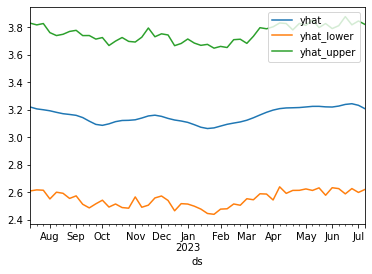

In [50]:
# Plot predictions for our forecast_mortgage15 DataFrame for the 52 week period 
forecast_mortgage15[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

In [58]:
# Plot predictions for our forecast_mortgage15 DataFrame for the 52 week period 
forecast_mortgage15[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2022-07-17,3.219557,2.608781,3.829852
2022-07-24,3.205960,2.616435,3.817468
2022-07-31,3.199633,2.613861,3.827187
2022-08-07,3.192141,2.550472,3.761115
2022-08-14,3.180919,2.599535,3.739754
2022-08-21,3.170911,2.591572,3.749091
2022-08-28,3.165442,2.554152,3.769743
2022-09-04,3.159028,2.572807,3.777804
2022-09-11,3.142751,2.511672,3.739563


<AxesSubplot:xlabel='ds'>

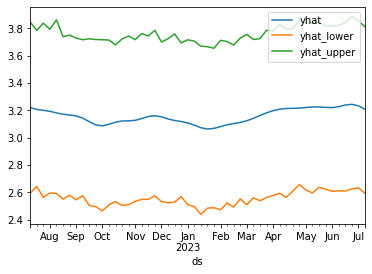

In [51]:
# Plot predictions for our forecast_mortgage30 DataFrame for the 52 week period 
forecast_mortgage30[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

<AxesSubplot:xlabel='ds'>

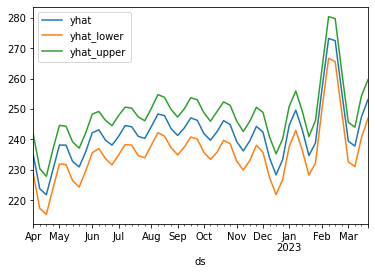

In [52]:
# Plot predictions for our forecast State Housing Prices DataFrame for the 52 week period 
forecast_states_housing_prices[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

<AxesSubplot:xlabel='ds'>

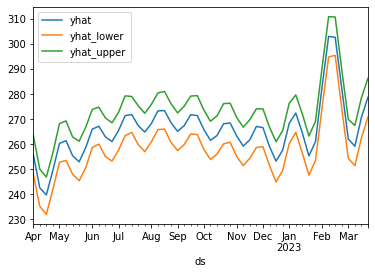

In [53]:
# Plot predictions for our forecast United States National Home Price Index DataFrame for the 52 week period 
forecast_USA[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

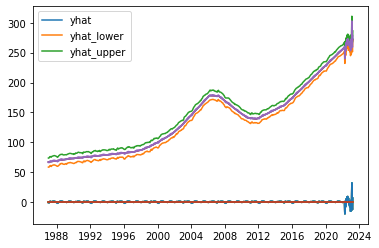

In [64]:
import matplotlib.pyplot as plt # plots 

fig, ax = plt.subplots()
ax.plot(forecast_USA)
ax.legend(['yhat', 'yhat_lower', 'yhat_upper'])

In [65]:
forecast_USA

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1987-01-01,67.076515,58.450895,73.629383,67.076515,67.076515,-0.830069,-0.830069,-0.830069,-0.830069,-0.830069,-0.830069,0.0,0.0,0.0,66.246446
1987-02-01,67.261793,58.572520,73.950579,67.261793,67.261793,-1.216524,-1.216524,-1.216524,-1.216524,-1.216524,-1.216524,0.0,0.0,0.0,66.045270
1987-03-01,67.429142,60.596315,75.886418,67.429142,67.429142,0.975314,0.975314,0.975314,0.975314,0.975314,0.975314,0.0,0.0,0.0,68.404456
1987-04-01,67.614420,61.145354,76.142517,67.614420,67.614420,1.362764,1.362764,1.362764,1.362764,1.362764,1.362764,0.0,0.0,0.0,68.977184
1987-05-01,67.793722,59.539547,75.072262,67.793722,67.793722,0.029710,0.029710,0.029710,0.029710,0.029710,0.029710,0.0,0.0,0.0,67.823431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-26,271.236856,274.269130,289.833006,270.358655,272.093663,11.149532,11.149532,11.149532,11.149532,11.149532,11.149532,0.0,0.0,0.0,282.386388
2023-03-05,271.496847,254.351742,269.935537,270.596368,272.419615,-9.423163,-9.423163,-9.423163,-9.423163,-9.423163,-9.423163,0.0,0.0,0.0,262.073684
2023-03-12,271.756838,251.439011,267.459868,270.798066,272.742503,-12.556640,-12.556640,-12.556640,-12.556640,-12.556640,-12.556640,0.0,0.0,0.0,259.200198
